**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/14alP_DrTlQpAe9jAl_T710OwIR76pQPk?usp=sharing)

<h1><b> Как появился WGAN </b></h1>

<p>С момена создания GAN в 2014году Яном Гудфеллоу и компанией, все прогрессивное сообщество подхватило эту идею и принялось ее постоянно усовершенствовать.
<p>6 декабря 2017 года сотрудники Курантского института математических наук и Facebook AI Research, совместно, выпустили статью под названием <b>Wasserstein GAN</b>.
<p>В данной статье научный коллектив исследует проблематику вероятности пространственного распределения. Т.е. каждый набор данных обладает некой плотностью распределения. GAN изучает плотность этого распределения и его задача максимизировать вероятность для наших данных. Т.е. если реальное распределение данных Pr имеет некую плотность, а Pθ является распределением параметризованной плотности, то задача GAN сводится к минимизации расхожедия Кульбака-Лейблера.
<p> В реальности же, мы имеем дело с небольшими распределениями. В таких случаях маловероятно, что распределение в модели и истинное имеют существенное пересечение, а это означает, что расстояние КЛ не определено (или бесконечно).
<p>Типичное решение этой проблемы - добавление шума к распределению модели. Вот почему практически все генеративные модели, описанные в классической литературе по машинному обучению, включают шумовую составляющую.
<p>В простейшем случае предполагается гауссов шум с относительно широкой полосой пропускания, чтобы охватить все примеры из набора данных. Хорошо известно, например, что в случае моделей генерирующих изображеня этот шум ухудшает их качество и делает размытыми. Другими словами, добавление шумовой составляющей явно неоправданно для решения проблемы распределения, но необходимо для того, чтобы подход максимального правдоподобия работал.

<p>Многие из вас, вероятно к этому моменту, уже начали зевать и нервно ерзать на стуле, но я вас успокою. В данном уроке мы не будем рассмтривать математические аспекты данной работы, а сразу перейдем к сути. Для тех же, кто хочет углубиться в математичекие дебри вот <a href = 'https://arxiv.org/abs/1701.07875v2'>ссылка на оригинальную статью</a>.

<p><b>Вклад WGAN в развитие GAN</b><br>
WGAN решает основные проблемы обучения GAN. В частности: 
<font size='3'><li>WGAN не требует поддержания тщательного баланса при обучении дискриминатора и генератора, в следствии чего не требует тщательного проектирования сетевой архитектуры. 
<li>Явление падения режима (или коллапаса), типичное для сетей GAN, также значительно сокращается.
<p>Одно из наиболее убедительных практических преимуществ WGAN - это возможность непрерывно оценивать расстояние между распределениями путем тренировки дискриминатора до оптимального уровня. Построение графиков обучения не только полезно для отладки и поиска гиперпараметров, но также очень хорошо коррелирует с качеством набора данных.

<p>Разработка WGAN имеет сильную математическую базу, хотя на практике требует лишь нескольких незначительных модификаций стандартной архитектуры глубокой сверточной генеративной состязательной сети, или DCGAN.
<p>Поэтому на этом и закончим с вводной частью и перейдем ближе к сути нашего урока


<h2><b> Проектирование WGAN </b><h2>

<p>Генеративная состязательная сеть Вассерштейна или Wasserstein GAN - это расширение генеративной состязательной сети (GAN), которое повышает стабильность при обучении модели и обеспечивает функцию ошибки, которая коррелирует с качеством сгенерированных изображений.

<p>Вместо использования дискриминатора для классификации или прогнозирования вероятности сгенерированных изображений, как реальных или поддельных, <i><b>WGAN изменяет или заменяет модель дискриминатора критиком</b></i>, который оценивает реалистичность или фальшивость сгенерированного изображения.

<p>Это изменение мотивировано теоретическим аргументом, что при обучении генератора необходимо стремиться к минимизации расстояния между распределением данных, наблюдаемых в наборе обучающих данных, и распределением, наблюдаемым в сгенерированных примерах.

<p>Преимущество WGAN состоит в том, что процесс обучения более стабилен и менее чувствителен к архитектуре модели и выбору конфигураций гиперпараметров, о чем говорилось ранее. Возможно, наиболее важным является то, что ошибка дискриминатора, связана с качеством изображений, созданных генератором.

На изображении ниже представлено краткое изложение основного цикла обучения WGAN, взятого из статьи. Обратите внимание на список рекомендуемых гиперпараметров, используемых в модели.

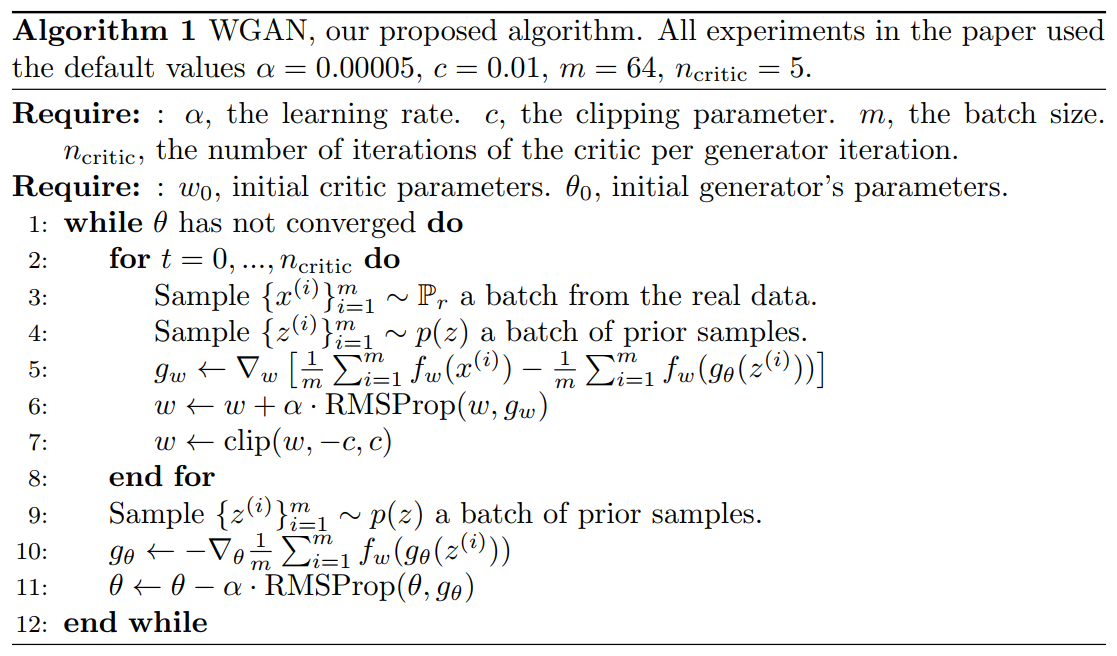

Различия в реализации для WGAN заключаются в следующем:
<ol>
<font size='3'><li>В модели Критика используем <b>Linear activation</b> вместо Sigmoid 
<li>Используем метку для реальных изображений -1, а для поддельных (сгенерированных) 1. (Обычно метки 1 и 0)
<li>Используем функцию ошибки Вассерштейна, при обучении моделей Критика и Генератора
<li>Ограничиваем веса модели Критика в диапазоне (-0.01,0.01) после каждого минибатча
<li>Обновляем модель Критика в несколько раз больше, чем Генеротор в каждой итерации. (например в 5 раз чаще)
<li>Используем оптимизатор RMSProp c небольшой скоростью обучения и без импульса (lr=0.00005) 
</ol>
<p>В качестве стандартной модели мы будем использовать DCGAN архитектуру (Deep Convultions GAN), разберем по пунктам новшества привнесенные WGAN:


<h3> <b> 1. Linear Activation на выходе модели Критика </b></h3>
<p>Тут все логично:

        # Вид выходного слоя модели Критика
        ...
        output_layer = (Dense(1, activation='linear'))(x)

>Знали ли вы, что: Linear activation является активацией использующейся по умолчанию для слоя, поэтому запись показанная ниже, будет равносильна предыдущей записи кода:

        # Вид выходного слоя модели Критика
        ...
        output_layer = (Dense(1))(x)

<h3> <b>2. Метки классов <i>Real\Fake</i> </b></h3>
<p>реализуем так:

        # метки для реальных изображений, -1  'real'
        y = -np.ones((batch_size, 1))
        ...
        # меткидля поддельных изображений 1.0  'fake'
        y = np.ones((batch_size, 1))

<h3> <b> 3. Функция ошибки Вассерштейна </b> </h3>

В стандартной модели DCGAN дискриминатор обучается используя функцию ошибки `binarycrossentropy`, так как перед ним стоит задача бинарной классификации (Real/Fake)
<p>Основным вкладом и новизной модели WGAN является использование новой функции ошибки, которая побуждает дискриминатор оценивать, насколько реальным или фальшивым выглядит сгенерированное изображение. Как раз эта функция и превращает роль дискриминатора из классификатора в критика, где разница между оценками настолько велика, насколько это возможно.
<p>В Keras мы можем реализовать ошибку Вассерштейна, как настраиваемую функцию, которая вычисляет средний балл для сгенерированных изображений. 
<p>Оценка максимальна для реальных изображений и тем меньше, чем хуже сгенерированное изображение. Учитывая, что стохастический градиентный спуск является алгоритмом минимизации, мы можем умножить метку класса на средний балл (например, на -1 для реального изображения и 1 для поддельного, что означает отсутствие эффекта), что гарантирует, что ошибка будет сводиться к минимуму.
<p>Эффективный вариант реализации этой функции ошибки для Keras приведен ниже:

        ## устанавливаем Keras backend
        from keras import backend

        # Определяем функцию ошибки
        def wassershtein_loss(y_true,y_pred):
            return backend.mean(y_true*y_pred)

Эту функцию ошибки будем использовать для обучения, указав ее имя при компиляции модели:

        # компиляция модели
        model.compile(loss=wasserstein_loss, ...)

<h3><b> 4. Ограничение весов модели Критика </b></h3>

<p>Мы можем реализовать ограничения весов модели в Keras как ограничения Keras:

        # Ограничение весов модели в заданном диапазоне
        class ClipConstraint():
            # Устанавливаем значения ограничений при инициализации
            def __init__(self, clip_value):
                self.clip_value = clip_value
        
            # ограничиваем ввеса по значениям clip_value
            def __call__(self, weights):
                return backend.clip(weights, -self.clip_value, self.clip_value)
        
            # получаем конфигурацию
            def get_config(self):
                return {'clip_value': self.clip_value}

Теперь, чтобы использовать ограничения весов необходимо создать класс ClipConstraint, а затем использовать его в интересующем слое, задав аргумент kernel_constraint, например так:

        # Определяем ограничения
        const = ClipConstraint(0.01)
        ...
        # Использование ограничений в слое
        x = Conv2D(..., kernel_constraint=const)

Ограничения требуются только при обновлении модели Критика

<h3><b> 5. Обновления Критика чаще, чем Генератора </b></h3>

<p>В обычном GAN как мы помним генратор и дискриминатор должны обновляться одинаковое количество раз. В WGAN мы задаем новый гиперпараметр n_critic, который задает число обновлений Критика на каждой итерации и устанавливаем его равным 5.
<p>Т.е. в стандартном цикле обучения GAN мы добавляем встроенный цикл для обучения Критика. Тут нет ничего сложного и как это реализовать мы увидем ниже в основном блоке кода.

<h3><b>6. Оптимизатор RMSProp</b></h3>

В стандартном GAN используют оптимизацию Адама стохастического градиентного спуска с небольшой скоростью обучения и скромным импульсом.

WGAN рекомендует вместо этого использовать RMSProp с lr = 0,00005 и нулевым моментом

Это может быть реализовано в Keras при компиляции модели. Например: 

        #компилируем модель
        opt = RMSprop(lerning_rate=0.00005)
        model.compile(loss=wasserstein_loss, optimizer=opt)

**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/14alP_DrTlQpAe9jAl_T710OwIR76pQPk?usp=sharing)